In [496]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

sorted_features = {}

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Learner Profile Classification

## Path explanation :
In the next we are going to work with each type sepratly, for each one of them we are going to extract the most important features that we will use in the correlation of the 3 datasets, some types are easy too work with and extract the most important features (Intelligence_type & Player_type), and other requires some extract work (trouble_type).
##### So for part one we are going to perform these steps : 
1. Read & explore the dataset 
2. Do dataset Features Summry 
3. Vectorize the Caterogical columns 
4. Split the dataset and Train Type classifier 
5. Perform testing on the classifier and optimize the results 
6. Analyse the most important features and pick the most effective ones


# Part 1 : Model training and Feature extraction

# 1. Intelligence Type

In [497]:
#Read the dataset
intel_df = pd.read_excel("Data\intel_competition.xlsx")

#In this case we need to remove the First id column 
del intel_df['Unnamed: 0']

intel_df

,Gender,Organizes activities with his friends,What are your strengths among these,What activity do you do most frequently?,have difficulty understanding what you have read?,FavoriteSubject,FavoriteGame,IntelligenceType
0,Female,Gather and disassemble things,Has a good sense of coordination and is skille...,do sport activities regularly and continuously,Artist or Architect,Arts,Building games or maze games or drawing guess ...,Spatial
1,Male,Draws or scribbles drawings and looks at pictures,Easily remember the rhythm or music of commerc...,watches movies and views pictures a lot,Gardener or Biologist,Music,Pet simulator,Spatial
2,Male,Listen to music or plays an instrument,Easily remember the rhythm or music of commerc...,listens to many styles of music often and repe...,Psychiatrist or Salesman or Counselor,foreign languages,Guess the song games,Musical
3,Male,Draws or scribbles drawings and looks at pictures,decides for himself what he think to do and tr...,intereste in the environment in his daily acti...,Mathematics teacher or engineer,Biology and Earth,Sports games,Naturalistic
4,Female,Organizes activities with his friends,decides for himself what he think to do and tr...,asks a lot of questions about how things work ...,Psychiatrist or Salesman or Counselor,Maths,Sports games,Logico MathÃ©matique
...,...,...,...,...,...,...,...,...
995,Male,Gather and disassemble things,Easily remember the rhythm or music of commerc...,listens to many styles of music often and repe...,Artist or Architect,Maths,Building games or maze games or drawing guess ...,Spatial
996,Male,Gather and disassemble things,Has a good sense of coordination and is skille...,do sport activities regularly and continuously,Dancer or Athlete or Build,Maths,Sports games,Kinesthetic
997,Male,Draws or scribbles drawings and looks at pictures,Has a good sense of coordination and is skille...,listens to many styles of music often and repe...,Mathematics teacher or engineer,Physical education,Puzzle games or strategy games,Logico MathÃ©matique
998,Male,Gather and disassemble things,Has a good sense of coordination and is skille...,do sport activities regularly and continuously,Dancer or Athlete or Build,Physical education,Sports games,Kinesthetic


In [498]:
for i in intel_df:
    print("Feature : '{}' has {} classes".format(i,len(set(intel_df[i]))))

Feature : 'Gender' has 2 classes
Feature : 'Organizes activities with his friends' has 8 classes
Feature : 'What are your strengths among these' has 8 classes
Feature : 'What activity do you do most frequently?' has 8 classes
Feature : 'have difficulty understanding what you have read?' has 8 classes
Feature : 'FavoriteSubject' has 6 classes
Feature : 'FavoriteGame' has 8 classes
Feature : 'IntelligenceType' has 8 classes


In [499]:
labels = set(intel_df['IntelligenceType'])
labels_val = list(intel_df['IntelligenceType'])
types = {}
for i in labels :
    types[i]= labels_val.count(i)
colors= px.colors.qualitative.Alphabet
fig = (go.Figure([go.Bar(x=list(types.keys()), y=list(types.values()),text=list(types.values()),textposition='auto',marker_color=colors)]))
fig.update_layout( title="Intelligence Types counts in the dataset ")
fig.show()

In [500]:
#Factorize the dataset for the next splitting and training phase (factorize means we transform from categorical to numerical )
#Transform into a new copy and keep the original 
intel_new = intel_df.apply(lambda x: pd.factorize(x)[0])
intel_new

,Gender,Organizes activities with his friends,What are your strengths among these,What activity do you do most frequently?,have difficulty understanding what you have read?,FavoriteSubject,FavoriteGame,IntelligenceType
0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0
2,1,2,1,2,2,2,2,1
3,1,1,2,3,3,3,3,2
4,0,3,2,4,2,4,3,3
...,...,...,...,...,...,...,...,...
995,1,0,1,2,0,4,0,0
996,1,0,0,0,4,4,3,4
997,1,1,0,2,3,5,6,3
998,1,0,0,0,4,5,3,4


In [501]:
# In this case we need to save the original label by it's value in each feature, for example after fectorizing Male becomes 1 and Female becomes 0 
labels = {}
for i in intel_df : 
    labels[i] = {}

for i in intel_df :
    for j in range(len(intel_df[i])):
        labels[i][intel_df[i][j]] = intel_new[i][j]
        
labels

{'Gender': {'Female': 0, 'Male': 1},
 'Organizes activities with his friends': {'Gather and disassemble things': 0,
  'Draws or scribbles drawings and looks at pictures': 1,
  'Listen to music or plays an instrument': 2,
  'Organizes activities with his friends': 3,
  'Spend a lot of time outdoors and identifie plants and animals or insects': 4,
  'Invent write and tell stories': 5,
  'Writes his diary or expresses his feelings in poems or only practices certain hobbies': 6,
  'Perform scientific experiments': 7},
 'What are your strengths among these': {'Has a good sense of coordination and is skilled in many sporting or physical activities': 0,
  'Easily remember the rhythm or music of commercials': 1,
  'decides for himself what he think to do and tracks his personal interests alone': 2,
  'has the ability to easily recognize birds plants and trees': 3,
  'expresses himself with a rich vocabulary': 4,
  'easily talks to people he does not know and easily perceives their feelings': 5

In [502]:
#Split the data into features and gold label
X = intel_new.iloc[:,0:-1] #Data features 
Y = intel_new['IntelligenceType'] #Golden_Label (The prediction class)

#Save the used features into a list to use them in the features importance part
intel_features = list( X.columns)

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(800, 7) (200, 7) (800,) (200,)


In [503]:
#Model creation and training 
forest = RandomForestClassifier( n_estimators = 400 , max_depth = 52, random_state = 0 )
Model_intel = forest.fit(X_train,y_train)

In [504]:
#Prediction and score calculations
intel_predictions = Model_intel.predict(X_test)

accuracy = accuracy_score(intel_predictions,y_test)
precision = precision_score(intel_predictions,y_test,average='macro')
recall = recall_score(intel_predictions,y_test,average='macro')
f1 = f1_score(intel_predictions,y_test,average='macro')

print("Metric scores :")
print(" Accuracy: {:.2f} %".format(accuracy*100))
print(" Precision: {:.2f} %".format(precision*100))
print(" Recall: {:.2f} %".format(recall*100))
print(" F1: {:.2f} %".format(f1*100))



print("\nConfusion Matrix :")
cm = confusion_matrix(intel_predictions, y_test)
print(cm)

Metric scores :
 Accuracy: 85.50 %
 Precision: 77.54 %
 Recall: 87.95 %
 F1: 81.21 %

Confusion Matrix :
[[43  4  0  4  0  0  1  2]
 [ 1 20  0  0  0  1  0  0]
 [ 1  0  4  0  0  0  0  0]
 [ 1  1  1 52  1  3  2  3]
 [ 0  0  0  1 30  0  0  0]
 [ 0  0  0  0  0 11  1  0]
 [ 0  0  0  0  0  1  5  0]
 [ 0  0  0  0  0  0  0  6]]



Classification Report :


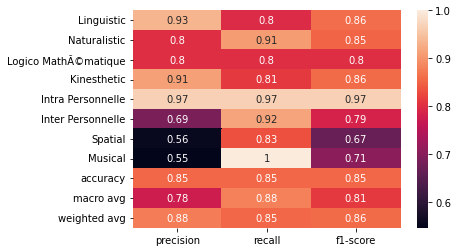

In [505]:
print("\nClassification Report :")
clf_report = classification_report(intel_predictions,y_test,output_dict=True,target_names=list(set(intel_df['IntelligenceType'])))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [506]:
#Extract the feature importances scores from the model
importance_intel = Model_intel.feature_importances_

#Combine the features with names
list_features = sorted(zip(importance_intel, intel_features), reverse=True)
all_features = {}
for i in list_features : 
    all_features[i[1]]=round(i[0],4)

x= list(all_features.keys())
y= list(all_features.values())

sorted_features['IntelligenceType'] = x

#Plot feature importance
fig = px.bar( y=y, x=x, text=y,color=y, title="Model Intelligence : The most effective features sorted")
fig.update_xaxes(title_text='Features')
fig.update_yaxes(title_text='Imporatnce scores')
fig.show()

# 2. Player Type

In [507]:
#Read the dataset
player_df = pd.read_excel("Data\player_type_competition.xlsx")

#In this case we need to remove the First id column 
del player_df['Unnamed: 0']

player_df

,He likes to be part of a team and enjoy collective activities,It's fun to be with others more than to be alone,Likes to help others,Loves to share his knowledge,It is important for him to follow his own way,He likes to try new things,He do not like to follow the rules,He likes to change things by himself,It is important for him that is always his duties in full,He likes to defeat obstacles,He loves competitions where they can win a prize,If sufficient reward will strive,Playertype
0,neutral,Does not like,Likes,neutral,Does not like,Does not like,Does not like,neutral,neutral,Does not like,neutral,Likes,type_player
1,Does not like,Does not like,Does not like,neutral,Does not like,neutral,neutral,neutral,neutral,Likes,neutral,neutral,type_achiever
2,Does not like,neutral,Likes,neutral,Likes,neutral,Likes,Does not like,Likes,Likes,neutral,Likes,type_achiever
3,neutral,Does not like,Does not like,Likes,Does not like,Likes,Likes,Does not like,Does not like,Likes,Does not like,Does not like,type_achiever
4,Does not like,Does not like,neutral,Likes,Likes,Does not like,neutral,Likes,Likes,neutral,neutral,Does not like,type_achiever
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Likes,Does not like,Likes,Likes,Likes,Likes,Does not like,Likes,neutral,Likes,Does not like,neutral,type_philanthropist
996,Does not like,neutral,neutral,neutral,Does not like,Likes,neutral,Does not like,Does not like,Likes,Does not like,neutral,type_achiever
997,Likes,Does not like,neutral,neutral,neutral,neutral,Does not like,Likes,Does not like,neutral,Does not like,neutral,type_socializer
998,Does not like,Does not like,Likes,Does not like,neutral,neutral,Likes,neutral,neutral,Likes,neutral,Likes,type_achiever


In [508]:
for i in player_df:
    print("Feature : '{}' has {} classes".format(i,len(set(player_df[i]))))

Feature : 'He likes to be part of a team and enjoy collective activities' has 3 classes
Feature : 'It's fun to be with others more than to be alone' has 3 classes
Feature : 'Likes to help others' has 3 classes
Feature : 'Loves to share his knowledge' has 3 classes
Feature : 'It is important for him to follow his own way' has 3 classes
Feature : 'He likes to try new things' has 3 classes
Feature : 'He do not like to follow the rules' has 3 classes
Feature : 'He likes to change things by himself' has 3 classes
Feature : 'It is important for him that is always his duties in full' has 3 classes
Feature : 'He likes to defeat obstacles' has 3 classes
Feature : 'He loves competitions where they can win a prize' has 3 classes
Feature : 'If sufficient reward will strive' has 3 classes
Feature : 'Playertype' has 6 classes


In [509]:
labels = set(player_df['Playertype'])
labels_val = list(player_df['Playertype'])
types = {}
for i in labels :
    types[i]= labels_val.count(i)
colors= px.colors.qualitative.Alphabet
fig = (go.Figure([go.Bar(x=list(types.keys()), y=list(types.values()),text=list(types.values()),textposition='auto',marker_color=colors)]))
fig.update_layout( title="Player Types counts in the dataset ")
fig.show()

In [510]:
#factorize the dataset
player_new = player_df.apply(lambda x: pd.factorize(x)[0])
player_new

,He likes to be part of a team and enjoy collective activities,It's fun to be with others more than to be alone,Likes to help others,Loves to share his knowledge,It is important for him to follow his own way,He likes to try new things,He do not like to follow the rules,He likes to change things by himself,It is important for him that is always his duties in full,He likes to defeat obstacles,He loves competitions where they can win a prize,If sufficient reward will strive,Playertype
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,1,1,0,0,1,0,1,1
2,1,1,0,0,1,1,2,1,1,1,0,0,1
3,0,0,1,1,0,2,2,1,2,1,1,2,1
4,1,0,2,1,1,0,1,2,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,0,1,1,2,0,2,0,1,1,1,3
996,1,1,2,0,0,2,1,1,2,1,1,1,1
997,2,0,2,0,2,1,0,2,2,2,1,1,4
998,1,0,0,2,2,1,2,0,0,1,0,0,1


In [511]:
#In this case we need to save the original label by it's value in each feature, for example after fectorizing Male becomes 1 and Female becomes 0 
labels = {}
for i in player_df : 
    labels[i] = {}

for i in player_df :
    for j in range(len(player_df[i])):
        labels[i][player_df[i][j]] = player_new[i][j]
        
labels

{'He likes to be part of a team and enjoy collective activities': {'neutral': 0,
  'Does not like': 1,
  'Likes': 2},
 "It's fun to be with others more than to be alone": {'Does not like': 0,
  'neutral': 1,
  'Likes': 2},
 'Likes to help others': {'Likes': 0, 'Does not like': 1, 'neutral': 2},
 'Loves to share his knowledge': {'neutral': 0,
  'Likes': 1,
  'Does not like': 2},
 'It is important for him to follow his own way': {'Does not like': 0,
  'Likes': 1,
  'neutral': 2},
 'He likes to try new things': {'Does not like': 0, 'neutral': 1, 'Likes': 2},
 'He do not like to follow the rules': {'Does not like': 0,
  'neutral': 1,
  'Likes': 2},
 'He likes to change things by himself': {'neutral': 0,
  'Does not like': 1,
  'Likes': 2},
 'It is important for him that is always his duties in full': {'neutral': 0,
  'Likes': 1,
  'Does not like': 2},
 'He likes to defeat obstacles': {'Does not like': 0,
  'Likes': 1,
  'neutral': 2},
 'He loves competitions where they can win a prize': {'

In [512]:
#Split the data into features and gold label
X = player_new.iloc[:,0:-1] #Data features 
Y = player_new['Playertype'] #Golden_Label (The prediction class)

#Save the used features into a list to use them in the features importance part
player_features = list( X.columns)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(800, 12) (200, 12) (800,) (200,)


In [513]:
#Model creation and training 
forest = RandomForestClassifier( n_estimators = 1300, max_depth = 23, random_state = 0)
Model_player = forest.fit(X_train,y_train)

In [514]:
#Prediction and score calculations
player_predictions = Model_player.predict(X_test)

accuracy = accuracy_score(player_predictions,y_test)
precision = precision_score(player_predictions,y_test,average='macro')
recall = recall_score(player_predictions,y_test,average='macro')
f1 = f1_score(player_predictions,y_test,average='macro')

print("Metric scores :")
print(" Accuracy: {:.2f} %".format(accuracy*100))
print(" Precision: {:.2f} %".format(precision*100))
print(" Recall: {:.2f} %".format(recall*100))
print(" F1: {:.2f} %".format(f1*100))



print("\nConfusion Matrix :")
cm = confusion_matrix(player_predictions, y_test)
print(cm)

Metric scores :
 Accuracy: 77.00 %
 Precision: 72.38 %
 Recall: 76.17 %
 F1: 73.48 %

Confusion Matrix :
[[17  0  1  0  0  2]
 [ 3 30  2  4  1  2]
 [ 0  3 27  1  2  1]
 [ 3  0  1 13  0  0]
 [ 1  2  1  7 56  3]
 [ 2  0  0  0  4 11]]



Classification Report :


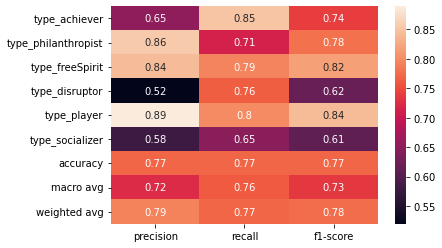

In [515]:
print("\nClassification Report :")
clf_report = classification_report(player_predictions,y_test,output_dict=True,target_names=list(set(player_df['Playertype'])))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [516]:
#Extract the feature importances scores from the model
importance_player = Model_player.feature_importances_

#Combine the features with names
list_features = sorted(zip(importance_player, player_features), reverse=True)
all_features = {}
for i in list_features : 
    all_features[i[1]]=round(i[0],4)

x= list(all_features.keys())
y= list(all_features.values())

sorted_features['PlayerType'] = x

#Plot feature importance
fig = px.bar( y=y, x=x, text=y,color=y, title="Model Player : The most effective features sorted")
fig.update_xaxes(title_text='Features')
fig.update_yaxes(title_text='Imporatnce scores')
fig.show()

## 3.Trouble Type

In [517]:
#Read the dataset
Trouble_df = pd.read_csv(r"Data\trouble_train.csv")

#In this case we need to remove the First id column 
del Trouble_df['Unnamed: 0']

Trouble_df

,Does he have health probems ?,Does he have social family problems?,Is there a variation between his real qualifications and its results?,Does he have any difficulties?,Does your child avoid activities that require reading to complete?,he ?it fast/slow while reading ?,"When reading aloud, does your child repeat words, change their order, or mix up similar letters (?\ or ?\? or ?\? or p/b or f/v or k/g/jÉ) without notice?",Does he have trouble reading unknown words?,Does he face difficulty understanding what he read?,Does he reflect numbers? {Ex 81 -> 18},...,Does he have a problem copying?,Does it confuse symbols and/or mathematical operations?,Does he have trouble comparing the relative size of integers and/or fractions?,Does he have difficulties with concepts related to time and/or money?,Is it difficult to understand the statement of calculations and solve it?,Is he having difficulties in calculating? {Facing problems in performing arithmetic operations such as addition and subtraction ...},Is he having trouble maintaining attention for more than 15 minutes?,It takes a long time to complete simple tasks?,Does he have a hard time bearing boredom or strenuous tasks?,TypeTrouble
0,No,No,Yeah,In particular article,Repeatedly / always,Average,Rarely / never,Sometimes,Rarely / never,Rarely / never,...,Repeatedly / always,Sometimes,Repeatedly / always,Sometimes,Sometimes,Repeatedly / always,Repeatedly / always,Rarely / never,Repeatedly / always,Type_dyscalculie
1,No,No,No,In particular article,Sometimes,Average,Repeatedly / always,Rarely / never,Sometimes,Sometimes,...,Rarely / never,Sometimes,Repeatedly / always,Repeatedly / always,Rarely / never,Sometimes,Repeatedly / always,Rarely / never,Repeatedly / always,Concentration
2,Yeah,Yeah,Yeah,In particular article,Rarely / never,Average,Sometimes,Repeatedly / always,Repeatedly / always,Rarely / never,...,Rarely / never,Rarely / never,Sometimes,Sometimes,Repeatedly / always,Repeatedly / always,Sometimes,Repeatedly / always,Rarely / never,Type_dyslexie
3,No,No,Yeah,In all materials,Sometimes,Slow,Repeatedly / always,Rarely / never,Sometimes,Sometimes,...,Repeatedly / always,Rarely / never,Sometimes,Repeatedly / always,Sometimes,Sometimes,Repeatedly / always,Repeatedly / always,Sometimes,Concentration
4,Yeah,Yeah,No,In particular article,Repeatedly / always,Average,Repeatedly / always,Repeatedly / always,Rarely / never,Sometimes,...,Rarely / never,Rarely / never,Rarely / never,Rarely / never,Rarely / never,Rarely / never,Rarely / never,Rarely / never,Rarely / never,Type_dyslexie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No,No,No,In particular article,Rarely / never,Slow,Sometimes,Repeatedly / always,Repeatedly / always,Rarely / never,...,Sometimes,Sometimes,Rarely / never,Rarely / never,Rarely / never,Rarely / never,Repeatedly / always,Rarely / never,Rarely / never,Type_dyslexie
996,Yeah,Yeah,Yeah,In all materials,Sometimes,Slow,Sometimes,Rarely / never,Repeatedly / always,Rarely / never,...,Repeatedly / always,Repeatedly / always,Sometimes,Rarely / never,Rarely / never,Sometimes,Sometimes,Repeatedly / always,Repeatedly / always,Concentration
997,Yeah,No,Yeah,In particular article,Sometimes,Fast,Rarely / never,Sometimes,Repeatedly / always,Rarely / never,...,Rarely / never,Rarely / never,Repeatedly / always,Repeatedly / always,Sometimes,Repeatedly / always,Rarely / never,Repeatedly / always,Repeatedly / always,Type_dyscalculie
998,Yeah,No,No,In all materials,Rarely / never,Fast,Repeatedly / always,Repeatedly / always,Rarely / never,Repeatedly / always,...,Sometimes,Repeatedly / always,Sometimes,Sometimes,Repeatedly / always,Rarely / never,Sometimes,Sometimes,Repeatedly / always,Concentration


In [518]:
for i in Trouble_df:
    print("Feature : '{}' has {} classes".format(i,len(set(Trouble_df[i]))))

Feature : 'Does he have health probems ?' has 2 classes
Feature : 'Does he have social family problems?' has 2 classes
Feature : 'Is there a variation between his real qualifications and its results?' has 2 classes
Feature : 'Does he have any difficulties?' has 2 classes
Feature : 'Does your child avoid activities that require reading to complete?' has 3 classes
Feature : 'he ?it fast/slow while reading ?' has 3 classes
Feature : 'When reading aloud, does your child repeat words, change their order, or mix up similar letters (?\ or ?\? or ?\? or p/b or f/v or k/g/jÉ) without notice?' has 3 classes
Feature : 'Does he have trouble reading unknown words?' has 3 classes
Feature : 'Does he face difficulty understanding what he read?' has 3 classes
Feature : 'Does he reflect numbers? {Ex 81 -> 18}' has 3 classes
Feature : 'Does he have trouble writing numbers clearly and distinctly from letters?' has 3 classes
Feature : 'Does he make misspellings in his homework?' has 3 classes
Feature : 'Is

In [519]:
labels = set(Trouble_df['TypeTrouble'])
labels_val = list(Trouble_df['TypeTrouble'])
types = {}
for i in labels :
    types[i]= labels_val.count(i)
colors= px.colors.qualitative.Alphabet
fig = (go.Figure([go.Bar(x=list(types.keys()), y=list(types.values()),text=list(types.values()),textposition='auto',marker_color=colors)]))
fig.update_layout( title="Trouble Types counts in the dataset ")
fig.show()

In [520]:
#factorize the dataset
Trouble_new = Trouble_df.apply(lambda x: pd.factorize(x)[0])
Trouble_new

,Does he have health probems ?,Does he have social family problems?,Is there a variation between his real qualifications and its results?,Does he have any difficulties?,Does your child avoid activities that require reading to complete?,he ?it fast/slow while reading ?,"When reading aloud, does your child repeat words, change their order, or mix up similar letters (?\ or ?\? or ?\? or p/b or f/v or k/g/jÉ) without notice?",Does he have trouble reading unknown words?,Does he face difficulty understanding what he read?,Does he reflect numbers? {Ex 81 -> 18},...,Does he have a problem copying?,Does it confuse symbols and/or mathematical operations?,Does he have trouble comparing the relative size of integers and/or fractions?,Does he have difficulties with concepts related to time and/or money?,Is it difficult to understand the statement of calculations and solve it?,Is he having difficulties in calculating? {Facing problems in performing arithmetic operations such as addition and subtraction ...},Is he having trouble maintaining attention for more than 15 minutes?,It takes a long time to complete simple tasks?,Does he have a hard time bearing boredom or strenuous tasks?,TypeTrouble
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,1,1,1,1,...,1,0,0,1,1,1,0,0,0,1
2,1,1,0,0,2,0,2,2,2,0,...,1,1,1,0,2,0,1,1,1,2
3,0,0,0,1,1,1,1,1,1,1,...,0,1,1,1,0,1,0,1,2,1
4,1,1,1,0,0,0,1,2,0,1,...,1,1,2,2,1,2,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,2,1,2,2,2,0,...,2,0,2,2,1,2,0,0,1,2
996,1,1,0,1,1,1,2,1,2,0,...,0,2,1,2,1,1,1,1,0,1
997,1,0,0,0,1,2,0,0,2,0,...,1,1,0,1,0,0,2,1,0,0
998,1,0,1,1,2,2,1,2,0,2,...,2,2,1,0,2,2,1,2,0,1


In [521]:
#In this case we need to save the original label by it's value in each feature, for example after fectorizing Male becomes 1 and Female becomes 0 
labels = {}
for i in Trouble_df : 
    labels[i] = {}

for i in Trouble_df :
    for j in range(len(Trouble_df[i])):
        labels[i][Trouble_df[i][j]] = Trouble_new[i][j]
        
labels

{'Does he have health probems ?': {'No': 0, 'Yeah': 1},
 'Does he have social family problems?': {'No': 0, 'Yeah': 1},
 'Is there a variation between his real qualifications and its results?': {'Yeah': 0,
  'No': 1},
 'Does he have any difficulties?': {'In particular article': 0,
  'In all materials': 1},
 'Does your child avoid activities that require reading to complete?': {'Repeatedly / always': 0,
  'Sometimes': 1,
  'Rarely / never': 2},
 'he ?it fast/slow while reading ?': {'Average': 0, 'Slow': 1, 'Fast': 2},
 'When reading aloud, does your child repeat words, change their order, or mix up similar letters (?\\ or ?\\? or ?\\? or p/b or f/v or k/g/jÉ) without notice?': {'Rarely / never': 0,
  'Repeatedly / always': 1,
  'Sometimes': 2},
 'Does he have trouble reading unknown words?': {'Sometimes': 0,
  'Rarely / never': 1,
  'Repeatedly / always': 2},
 'Does he face difficulty understanding what he read?': {'Rarely / never': 0,
  'Sometimes': 1,
  'Repeatedly / always': 2},
 'Doe

In [522]:
#Split the data into features and gold label
X = Trouble_new.iloc[:,0:-1] #Data features 
Y = Trouble_new['TypeTrouble'] #Golden_Label (The prediction class)

#Save the used features into a list to use them in the features importance part
Trouble_features = list(X.columns)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(800, 22) (200, 22) (800,) (200,)


In [523]:
#Model creation and training 
forest = AdaBoostClassifier( n_estimators = 1300, random_state = 0)
Model_Trouble = forest.fit(X_train,y_train)

In [524]:
#Prediction and score calculations
Trouble_predictions = Model_Trouble.predict(X_test)

accuracy = accuracy_score(Trouble_predictions,y_test)
precision = precision_score(Trouble_predictions,y_test,average='macro')
recall = recall_score(Trouble_predictions,y_test,average='macro')
f1 = f1_score(Trouble_predictions,y_test,average='macro')

print("Metric scores :")
print(" Accuracy: {:.2f} %".format(accuracy*100))
print(" Precision: {:.2f} %".format(precision*100))
print(" Recall: {:.2f} %".format(recall*100))
print(" F1: {:.2f} %".format(f1*100))



print("\nConfusion Matrix :")
cm = confusion_matrix(Trouble_predictions, y_test)
print(cm)

Metric scores :
 Accuracy: 86.00 %
 Precision: 86.38 %
 Recall: 85.91 %
 F1: 85.84 %

Confusion Matrix :
[[36  5  2  2]
 [ 0 45  0  2]
 [ 4  2 40  5]
 [ 1  3  2 51]]



Classification Report :


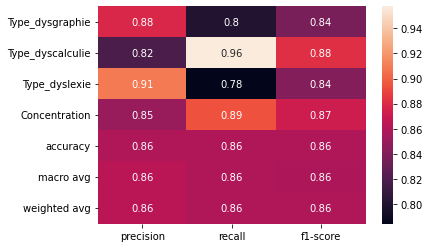

In [525]:
print("\nClassification Report :")
clf_report = classification_report(Trouble_predictions,y_test,output_dict=True,target_names=list(set(Trouble_df['TypeTrouble'])))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

In [526]:
#Extract the feature importances scores from the model
importance_Trouble = Model_Trouble.feature_importances_

#Combine the features with names
list_features = sorted(zip(importance_Trouble, Trouble_features), reverse=True)
all_features = {}
for i in list_features : 
    all_features[i[1]]=round(i[0],4)

x= list(all_features.keys())
y= list(all_features.values())

sorted_features['TroubleType'] = x

#Plot feature importance
fig = px.bar( y=y, x=x, text=y,color=y, title="Model Trouble : The most effective features sorted", height=1200)
fig.update_xaxes(tickangle=50)
fig.update_xaxes(title_text='Features')
fig.update_yaxes(title_text='Imporatnce scores')
fig.show()

## Part 2 : Feature analysis and selection
So after creating a classifier for each dataset and get a lis of sorted features, as we notice that for each model we have for each type about 5 to 6 very effective features that have the most importance in class decision, so the idea comes to just choose the most important features for each type and merge them together into a new dataset that will make a correlation between the 3 Types 

In [527]:
#save a copy from the sorted features
all_features = sorted_features

In [528]:
#Feature selections (Reducing the features to 6 for each type)
for i in sorted_features:
    sorted_features[i] = sorted_features[i][:6]

for i in sorted_features:
    print(i + ':')
    print(sorted_features[i])
    print()


IntelligenceType:
['What activity do you do most frequently?', 'Organizes activities with his friends', 'FavoriteGame', 'What are your strengths among these', 'have difficulty understanding what you have read?', 'FavoriteSubject']

PlayerType:
['He likes to be part of a team and enjoy collective activities', "It's fun to be with others more than to be alone", 'It is important for him that is always his duties in full', 'He likes to defeat obstacles', 'He do not like to follow the rules', 'He likes to change things by himself']

TroubleType:
['Does he have a hard time bearing boredom or strenuous tasks?', 'It takes a long time to complete simple tasks?', 'Does he make misspellings in his homework?', 'Is he having trouble maintaining attention for more than 15 minutes?', 'he ?it fast/slow while reading ?', 'Is it difficult to understand the statement of calculations and solve it?']



In [530]:
#Combining the selected features
final_features = []

for i in sorted_features:
    final_features.extend(sorted_features[i])

final_features

['What activity do you do most frequently?',
 'Organizes activities with his friends',
 'FavoriteGame',
 'What are your strengths among these',
 'have difficulty understanding what you have read?',
 'FavoriteSubject',
 'He likes to be part of a team and enjoy collective activities',
 "It's fun to be with others more than to be alone",
 'It is important for him that is always his duties in full',
 'He likes to defeat obstacles',
 'He do not like to follow the rules',
 'He likes to change things by himself',
 'Does he have a hard time bearing boredom or strenuous tasks?',
 'It takes a long time to complete simple tasks?',
 'Does he make misspellings in his homework?',
 'Is he having trouble maintaining attention for more than 15 minutes?',
 'he ?it fast/slow while reading ?',
 'Is it difficult to understand the statement of calculations and solve it?']

# Extra testing part
In this part, we are going to combine the three datasets and use only the final important features in the building, and as an extra step we are going to build three models that will use only the new features to get each type

In [531]:
#Read all the three datasets and clean them from indices 
intel_df = pd.read_excel("Data\intel_competition.xlsx");del intel_df['Unnamed: 0']
player_df = pd.read_excel("Data\player_type_competition.xlsx");del player_df['Unnamed: 0']
Trouble_df = pd.read_csv(r"Data\trouble_train.csv");del Trouble_df['Unnamed: 0']

In [532]:
combined = (Trouble_df.join(intel_df)).join(player_df)

In [533]:
combined.head(5)

,Does he have health probems ?,Does he have social family problems?,Is there a variation between his real qualifications and its results?,Does he have any difficulties?,Does your child avoid activities that require reading to complete?,he ?it fast/slow while reading ?,"When reading aloud, does your child repeat words, change their order, or mix up similar letters (?\ or ?\? or ?\? or p/b or f/v or k/g/jÉ) without notice?",Does he have trouble reading unknown words?,Does he face difficulty understanding what he read?,Does he reflect numbers? {Ex 81 -> 18},...,Loves to share his knowledge,It is important for him to follow his own way,He likes to try new things,He do not like to follow the rules,He likes to change things by himself,It is important for him that is always his duties in full,He likes to defeat obstacles,He loves competitions where they can win a prize,If sufficient reward will strive,Playertype
0,No,No,Yeah,In particular article,Repeatedly / always,Average,Rarely / never,Sometimes,Rarely / never,Rarely / never,...,neutral,Does not like,Does not like,Does not like,neutral,neutral,Does not like,neutral,Likes,type_player
1,No,No,No,In particular article,Sometimes,Average,Repeatedly / always,Rarely / never,Sometimes,Sometimes,...,neutral,Does not like,neutral,neutral,neutral,neutral,Likes,neutral,neutral,type_achiever
2,Yeah,Yeah,Yeah,In particular article,Rarely / never,Average,Sometimes,Repeatedly / always,Repeatedly / always,Rarely / never,...,neutral,Likes,neutral,Likes,Does not like,Likes,Likes,neutral,Likes,type_achiever
3,No,No,Yeah,In all materials,Sometimes,Slow,Repeatedly / always,Rarely / never,Sometimes,Sometimes,...,Likes,Does not like,Likes,Likes,Does not like,Does not like,Likes,Does not like,Does not like,type_achiever
4,Yeah,Yeah,No,In particular article,Repeatedly / always,Average,Repeatedly / always,Repeatedly / always,Rarely / never,Sometimes,...,Likes,Likes,Does not like,neutral,Likes,Likes,neutral,neutral,Does not like,type_achiever


In [534]:
final_features

['What activity do you do most frequently?',
 'Organizes activities with his friends',
 'FavoriteGame',
 'What are your strengths among these',
 'have difficulty understanding what you have read?',
 'FavoriteSubject',
 'He likes to be part of a team and enjoy collective activities',
 "It's fun to be with others more than to be alone",
 'It is important for him that is always his duties in full',
 'He likes to defeat obstacles',
 'He do not like to follow the rules',
 'He likes to change things by himself',
 'Does he have a hard time bearing boredom or strenuous tasks?',
 'It takes a long time to complete simple tasks?',
 'Does he make misspellings in his homework?',
 'Is he having trouble maintaining attention for more than 15 minutes?',
 'he ?it fast/slow while reading ?',
 'Is it difficult to understand the statement of calculations and solve it?']

In [535]:
features =  final_features + ["Playertype","TypeTrouble","IntelligenceType"]
to_rvm = []
for i in combined.columns :
    if i not in features :
        to_rvm.append(i)
for r in to_rvm :
    del combined[r]

In [536]:
combined

,he ?it fast/slow while reading ?,Does he make misspellings in his homework?,Is it difficult to understand the statement of calculations and solve it?,Is he having trouble maintaining attention for more than 15 minutes?,It takes a long time to complete simple tasks?,Does he have a hard time bearing boredom or strenuous tasks?,TypeTrouble,Organizes activities with his friends,What are your strengths among these,What activity do you do most frequently?,...,FavoriteSubject,FavoriteGame,IntelligenceType,He likes to be part of a team and enjoy collective activities,It's fun to be with others more than to be alone,He do not like to follow the rules,He likes to change things by himself,It is important for him that is always his duties in full,He likes to defeat obstacles,Playertype
0,Average,Rarely / never,Sometimes,Repeatedly / always,Rarely / never,Repeatedly / always,Type_dyscalculie,Gather and disassemble things,Has a good sense of coordination and is skille...,do sport activities regularly and continuously,...,Arts,Building games or maze games or drawing guess ...,Spatial,neutral,Does not like,Does not like,neutral,neutral,Does not like,type_player
1,Average,Rarely / never,Rarely / never,Repeatedly / always,Rarely / never,Repeatedly / always,Concentration,Draws or scribbles drawings and looks at pictures,Easily remember the rhythm or music of commerc...,watches movies and views pictures a lot,...,Music,Pet simulator,Spatial,Does not like,Does not like,neutral,neutral,neutral,Likes,type_achiever
2,Average,Repeatedly / always,Repeatedly / always,Sometimes,Repeatedly / always,Rarely / never,Type_dyslexie,Listen to music or plays an instrument,Easily remember the rhythm or music of commerc...,listens to many styles of music often and repe...,...,foreign languages,Guess the song games,Musical,Does not like,neutral,Likes,Does not like,Likes,Likes,type_achiever
3,Slow,Repeatedly / always,Sometimes,Repeatedly / always,Repeatedly / always,Sometimes,Concentration,Draws or scribbles drawings and looks at pictures,decides for himself what he think to do and tr...,intereste in the environment in his daily acti...,...,Biology and Earth,Sports games,Naturalistic,neutral,Does not like,Likes,Does not like,Does not like,Likes,type_achiever
4,Average,Repeatedly / always,Rarely / never,Rarely / never,Rarely / never,Rarely / never,Type_dyslexie,Organizes activities with his friends,decides for himself what he think to do and tr...,asks a lot of questions about how things work ...,...,Maths,Sports games,Logico MathÃ©matique,Does not like,Does not like,neutral,Likes,Likes,neutral,type_achiever
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Slow,Sometimes,Rarely / never,Repeatedly / always,Rarely / never,Rarely / never,Type_dyslexie,Gather and disassemble things,Easily remember the rhythm or music of commerc...,listens to many styles of music often and repe...,...,Maths,Building games or maze games or drawing guess ...,Spatial,Likes,Does not like,Does not like,Likes,neutral,Likes,type_philanthropist
996,Slow,Sometimes,Rarely / never,Sometimes,Repeatedly / always,Repeatedly / always,Concentration,Gather and disassemble things,Has a good sense of coordination and is skille...,do sport activities regularly and continuously,...,Maths,Sports games,Kinesthetic,Does not like,neutral,neutral,Does not like,Does not like,Likes,type_achiever
997,Fast,Sometimes,Sometimes,Rarely / never,Repeatedly / always,Repeatedly / always,Type_dyscalculie,Draws or scribbles drawings and looks at pictures,Has a good sense of coordination and is skille...,listens to many styles of music often and repe...,...,Physical education,Puzzle games or strategy games,Logico MathÃ©matique,Likes,Does not like,Does not like,Likes,Does not like,neutral,type_socializer
998,Fast,Repeatedly / always,Repeatedly / always,Sometimes,Sometimes,Repeatedly / always,Concentration,Gather and disassemble things,Has a good sense of coordination and is skille...,d

In [537]:
#In this Case, we have our final dataset with only the wanted features and mosy effective ones. 
#Maybe, we try to build a model for one of the 3 types, a multilabel Label Profile Classification similar to the ones used
#for recommandation system and some multi-categorical classification 

In [561]:
#Factorize the combined dataset into new one
df_new = combined.apply(lambda x: pd.factorize(x)[0])
df_new

,he ?it fast/slow while reading ?,Does he make misspellings in his homework?,Is it difficult to understand the statement of calculations and solve it?,Is he having trouble maintaining attention for more than 15 minutes?,It takes a long time to complete simple tasks?,Does he have a hard time bearing boredom or strenuous tasks?,TypeTrouble,Organizes activities with his friends,What are your strengths among these,What activity do you do most frequently?,...,FavoriteSubject,FavoriteGame,IntelligenceType,He likes to be part of a team and enjoy collective activities,It's fun to be with others more than to be alone,He do not like to follow the rules,He likes to change things by himself,It is important for him that is always his duties in full,He likes to defeat obstacles,Playertype
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,1,1,1,...,1,1,0,1,0,1,0,0,1,1
2,0,1,2,1,1,1,2,2,1,2,...,2,2,1,1,1,2,1,1,1,1
3,1,1,0,0,1,2,1,1,2,3,...,3,3,2,0,0,2,1,2,1,1
4,0,1,1,2,0,1,2,3,2,4,...,4,3,3,1,0,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2,1,0,0,1,2,0,1,2,...,4,0,0,2,0,0,2,0,1,3
996,1,2,1,1,1,0,1,0,0,0,...,4,3,4,1,1,1,1,2,1,1
997,2,2,0,2,1,0,0,1,0,2,...,5,6,3,2,0,0,2,2,2,4
998,2,1,2,1,2,0,1,0,0,0,...,5,3,4,1,0,2,0,0,1,1


In [562]:
X = df_new[final_features]
Y = df_new[["Playertype","TypeTrouble","IntelligenceType"]] 

Trouble_features = list(X.columns)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

X.head(5)

(800, 18) (200, 18) (800, 3) (200, 3)


,What activity do you do most frequently?,Organizes activities with his friends,FavoriteGame,What are your strengths among these,have difficulty understanding what you have read?,FavoriteSubject,He likes to be part of a team and enjoy collective activities,It's fun to be with others more than to be alone,It is important for him that is always his duties in full,He likes to defeat obstacles,He do not like to follow the rules,He likes to change things by himself,Does he have a hard time bearing boredom or strenuous tasks?,It takes a long time to complete simple tasks?,Does he make misspellings in his homework?,Is he having trouble maintaining attention for more than 15 minutes?,he ?it fast/slow while reading ?,Is it difficult to understand the statement of calculations and solve it?
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,1
2,2,2,2,1,2,2,1,1,1,1,2,1,1,1,1,1,0,2
3,3,1,3,2,3,3,0,0,2,1,2,1,2,1,1,0,1,0
4,4,3,3,2,2,4,1,0,1,2,1,2,1,0,1,2,0,1


In [565]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)), ])

for category in ["Playertype","TypeTrouble","IntelligenceType"]:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, y_train[category])
    
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    print("\nClassification Report :")
    clf_report = classification_report(prediction,y_test[category])
    print(clf_report)
    print("\n")

**Processing Playertype comments...**
Test accuracy is 0.465

Classification Report :
              precision    recall  f1-score   support

           0       0.04      0.25      0.07         4
           1       0.51      0.40      0.45        45
           2       0.69      0.48      0.56        46
           3       0.04      0.20      0.07         5
           4       0.79      0.54      0.64        93
           5       0.05      0.14      0.08         7

    accuracy                           0.47       200
   macro avg       0.35      0.33      0.31       200
weighted avg       0.65      0.47      0.53       200



**Processing TypeTrouble comments...**
Test accuracy is 0.47

Classification Report :
              precision    recall  f1-score   support

           0       0.27      0.48      0.34        23
           1       0.73      0.58      0.65        69
           2       0.32      0.37      0.34        38
           3       0.48      0.41      0.45        70

    accurac

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

